# Análisis Exploratorio de los Datasets Procesados (MEPS 2022)
Este notebook explora las variables principales de los archivos procesados en la carpeta `data/`. Se realiza un análisis estadístico y de distribución para variables demográficas, de salud, primas, pagos y empleo, considerando el tratamiento adecuado de datos faltantes o no aplicables.

In [84]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [85]:
# Cargar el dataset final unificado para modelado
import pandas as pd
df = pd.read_csv('../Models/meps_ml_dataset.csv')
print('Columnas disponibles en el dataset final:', list(df.columns))

Columnas disponibles en el dataset final: ['edad', 'estado_salud_percibido', 'ccsr_num_total', 'ccsr_otra_condicion', 'categoria_pobreza', 'tiene_historial_empleo', 'horas_por_semana', 'sexo_Male', 'raza_etnicidad_Non-Hispanic Asian only', 'raza_etnicidad_Non-Hispanic Black only', 'raza_etnicidad_Non-Hispanic Other race or multi-race', 'raza_etnicidad_Non-Hispanic White only', 'estado_civil_Married', 'estado_civil_Never married', 'estado_civil_Separated', 'estado_civil_Under 16 - not applicable', 'estado_civil_Widowed', 'region_Midwest', 'region_Northeast', 'region_South', 'region_West', 'ccsr_Essential hypertension', 'ccsr_Disorders of lipid metabolism', 'ccsr_Diabetes mellitus without complication', 'ccsr_Bacterial infections', 'ccsr_Osteoarthritis', 'ccsr_Cataract and other lens disorders', 'ccsr_Esophageal disorders', 'ccsr_Retinal and vitreous conditions', 'ccsr_Other general signs and symptoms', 'ccsr_Abnormal findings without diagnosis', 'seguro_Public only', 'seguro_Uninsured',

## Análisis General de Personas
- Cantidad de personas individuales
- Estadísticas de edad (mínima, máxima, Q1, Q3, media, mediana)
- Cantidad de personas por raza, estado civil y región
- Cantidad de personas en cada categoría de pobreza
        

In [86]:
# Detectar nombres de columnas relevantes de forma flexible (ignorando mayúsculas/minúsculas)
print('Columnas disponibles en fyc:', list(fyc.columns))

def buscar_columna(df, posibles):
    cols = [c for c in df.columns for p in posibles if c.lower() == p.lower()]
    return cols[0] if cols else None

col_age = buscar_columna(fyc, ['age', 'edad'])
col_race = buscar_columna(fyc, ['race', 'raza'])
col_marital = buscar_columna(fyc, ['marital_status', 'estado_civil'])
col_region = buscar_columna(fyc, ['region', 'región'])
col_poverty = buscar_columna(fyc, ['poverty_category', 'categoria_pobreza'])

# Análisis general de personas en el dataset final para modelado
import pandas as pd
import numpy as np

# Estadísticas de edad
edad = pd.to_numeric(df['edad'], errors='coerce')
print('Edad - min:', edad.min(), 'max:', edad.max(), 'Q1:', edad.quantile(0.25), 'Q3:', edad.quantile(0.75), 'media:', edad.mean(), 'mediana:', edad.median())

# Cantidad por sexo
print('Cantidad por sexo:')
print('Mujer:', (df['sexo_Male']==0).sum(), 'Hombre:', (df['sexo_Male']==1).sum())

# Cantidad por región
region_cols = ['region_Midwest','region_Northeast','region_South','region_West']
for col in region_cols:
    print(f"{col.replace('region_','')}: {df[col].sum()}")

# Cantidad por raza
race_cols = [
    'raza_etnicidad_Non-Hispanic Asian only',
    'raza_etnicidad_Non-Hispanic Black only',
    'raza_etnicidad_Non-Hispanic Other race or multi-race',
    'raza_etnicidad_Non-Hispanic White only'
 ]
for col in race_cols:
    print(f"{col.replace('raza_etnicidad_','')}: {df[col].sum()}")

# Cantidad por categoría de pobreza
print('Cantidad por categoría de pobreza:')
print(df['categoria_pobreza'].value_counts(dropna=False))

print('Cantidad de personas individuales:', len(personas))

Columnas disponibles en fyc: ['dwelling_unit_id', 'person_id', 'person_unique_id', 'panel_number', 'age_last_birthday', 'sex', 'race_ethnicity', 'marital_status_2022', 'region_2022', 'total_healthcare_exp_2022', 'total_out_of_pocket_exp_2022', 'poverty_category_2022', 'insurance_coverage_2022', 'perceived_health_status', 'person_weight_2022']
Edad - min: 0.0 max: 85.0 Q1: 26.0 Q3: 59.0 media: 42.03336931985474 mediana: 43.0
Cantidad por sexo:
Mujer: 5265 Hombre: 4924
Midwest: 2331
Northeast: 1690
South: 3490
West: 2641
Non-Hispanic Asian only: 735
Non-Hispanic Black only: 1083
Non-Hispanic Other race or multi-race: 392
Non-Hispanic White only: 6560
Cantidad por categoría de pobreza:
categoria_pobreza
0    5726
2    3114
1     779
4     423
3     147
Name: count, dtype: int64
Cantidad de personas individuales: 22431


## Análisis de Condiciones Médicas
- Cantidad de condiciones médicas distintas
- Media de condiciones por persona
- Top 5 condiciones más comunes (general, mujeres, hombres)
        

In [87]:
# Análisis de condiciones médicas en el dataset final para modelado
import numpy as np

# Total de condiciones principales (suma de las 10 dummies)
disease_cols = [
    'ccsr_Essential hypertension',
    'ccsr_Disorders of lipid metabolism',
    'ccsr_Diabetes mellitus without complication',
    'ccsr_Bacterial infections',
    'ccsr_Osteoarthritis',
    'ccsr_Cataract and other lens disorders',
    'ccsr_Esophageal disorders',
    'ccsr_Retinal and vitreous conditions',
    'ccsr_Other general signs and symptoms',
    'ccsr_Abnormal findings without diagnosis'
 ]
condiciones_por_persona = df[disease_cols].sum(axis=1)
print('Media de condiciones principales por persona:', condiciones_por_persona.mean())
print('Cantidad de personas con al menos una condición principal:', (condiciones_por_persona>0).sum())
print('Top 5 condiciones más comunes:')
for col in sorted(disease_cols, key=lambda c: df[c].sum(), reverse=True)[:5]:
    print(f"{col.replace('ccsr_','')}: {df[col].sum()}")
print('Cantidad de personas con otras condiciones:', (df['ccsr_otra_condicion']>0).sum())

# Análisis de empleo con el nuevo dataset
print('Distribución de personas con historial de empleo:')
print(df['tiene_historial_empleo'].value_counts())
print('\nEstadísticas de horas trabajadas por semana (solo para quienes tienen historial de empleo):')
trabajadores = df[df['tiene_historial_empleo'] == 1]
print(trabajadores['horas_por_semana'].describe())

Media de condiciones principales por persona: 0.6735695357738738
Cantidad de personas con al menos una condición principal: 3712
Top 5 condiciones más comunes:
Essential hypertension: 2101
Disorders of lipid metabolism: 1667
Diabetes mellitus without complication: 782
Esophageal disorders: 578
Osteoarthritis: 557
Cantidad de personas con otras condiciones: 6986
Distribución de personas con historial de empleo:
tiene_historial_empleo
1    7184
0    3005
Name: count, dtype: int64

Estadísticas de horas trabajadas por semana (solo para quienes tienen historial de empleo):
count    7184.000000
mean       38.494053
std        12.199959
min         1.000000
25%        37.000000
50%        40.000000
75%        40.000000
max       168.000000
Name: horas_por_semana, dtype: float64


## Análisis de Primas y Pagos
- Estadísticas de prima out of pocket y otras columnas de pagos
        

In [88]:
# Primas y pagos: columnas relevantes en prpl
pagos = pd.to_numeric(prpl['out_of_pocket_premium_edited'], errors='coerce')
print('Estadísticas para out_of_pocket_premium_edited:')
print('min:', pagos.min(), 'max:', pagos.max(), 'media:', pagos.mean(), 'mediana:', pagos.median(), 'Q1:', pagos.quantile(0.25), 'Q3:', pagos.quantile(0.75))
print('Cantidad de valores válidos:', pagos.notna().sum())

Estadísticas para out_of_pocket_premium_edited:
min: 0.0 max: 4583.33 media: 306.679531166348 mediana: 212.5 Q1: 70.0 Q3: 433.33
Cantidad de valores válidos: 13075


## Análisis de Empleo y Seguro Médico
- Cantidad de personas con trabajo que ofrecen seguro médico
- Cantidad de personas por categoría de trabajo
- Estadísticas de horas trabajadas y salario por hora
        

In [89]:
# Empleo: columnas relevantes en jobs
trabajos = jobs.copy()
# Personas con trabajo que ofrecen seguro médico
ofrecen_seguro = trabajos[trabajos['insurance_offered'] == 1]['person_unique_id'].nunique()
print('Cantidad de personas con trabajo que ofrecen seguro médico:', ofrecen_seguro)
# Estadísticas de horas trabajadas y salario por hora
for col in ['hours_per_week', 'hourly_wage']:
    vals = pd.to_numeric(trabajos[col], errors='coerce')
    print(f'Estadísticas para {col}:')
    print('min:', vals.min(), 'max:', vals.max(), 'media:', vals.mean(), 'mediana:', vals.median(), 'Q1:', vals.quantile(0.25), 'Q3:', vals.quantile(0.75))
    print('Cantidad de valores válidos:', vals.notna().sum())

# Análisis de estado civil con el nuevo dataset
marital_cols = [col for col in df.columns if col.startswith('marital_')]
print('Columnas de estado civil:', marital_cols)
marital_counts = df[marital_cols].sum().sort_values(ascending=False)
print('Distribución de estado civil (conteo de one-hot):')
print(marital_counts)

Cantidad de personas con trabajo que ofrecen seguro médico: 0
Estadísticas para hours_per_week:
min: 1.0 max: 168.0 media: 35.83322260975475 mediana: 40.0 Q1: 30.0 Q3: 40.0
Cantidad de valores válidos: 36126
Estadísticas para hourly_wage:
min: 0.0 max: 115.0 media: 20.648742049992602 mediana: 18.0 Q1: 15.0 Q3: 24.0
Cantidad de valores válidos: 13522
Columnas de estado civil: []
Distribución de estado civil (conteo de one-hot):
Series([], dtype: float64)


In [90]:
# Análisis estadístico de la variable objetivo: prima_out_of_pocket_editada (desde el JSON unificado)

import json
import numpy as np

# Cargar el JSON unificado
with open('../meps_2022_unified_reduced.json', encoding='utf-8') as f:
    data = json.load(f)

# Extraer todas las primas válidas de todos los historiales de seguros
primas = []
for persona in data.values():
    for seguro in persona.get('historial_seguros', []):
        try:
            valor = float(seguro.get('prima_out_of_pocket_editada', None))
            if not np.isnan(valor):
                primas.append(valor)
        except (TypeError, ValueError):
            continue

primas = np.array(primas)
print(f'Entradas válidas: {len(primas)}')
print(f'Mínimo: {primas.min()}')
print(f'Máximo: {primas.max()}')
print(f'Media: {primas.mean()}')
print(f'Mediana: {np.median(primas)}')
print(f'Q1: {np.percentile(primas, 25)}')
print(f'Q3: {np.percentile(primas, 75)}')
print(f'Varianza: {primas.var()}')
print(f'Desviación estándar: {primas.std()}')
print(f'Dispersión (máx - mín): {primas.max() - primas.min()}')
print(f'Sesgo: {((primas - primas.mean())**3).mean() / (primas.std()**3)}')

# Análisis de categoría de pobreza con el nuevo dataset
print('Distribución de categoría de pobreza:')
print(df['categoria_pobreza'].value_counts())


Entradas válidas: 10763
Mínimo: 1.0
Máximo: 4583.33
Media: 356.09316826163706
Mediana: 266.5
Q1: 130.0
Q3: 472.16499999999996
Varianza: 114585.08650403812
Desviación estándar: 338.5041897880115
Dispersión (máx - mín): 4582.33
Sesgo: 2.9517090081337325
Distribución de categoría de pobreza:
categoria_pobreza
0    5726
2    3114
1     779
4     423
3     147
Name: count, dtype: int64

Mínimo: 1.0
Máximo: 4583.33
Media: 356.09316826163706
Mediana: 266.5
Q1: 130.0
Q3: 472.16499999999996
Varianza: 114585.08650403812
Desviación estándar: 338.5041897880115
Dispersión (máx - mín): 4582.33
Sesgo: 2.9517090081337325
Distribución de categoría de pobreza:
categoria_pobreza
0    5726
2    3114
1     779
4     423
3     147
Name: count, dtype: int64


## Análisis estadístico y visual de la variable objetivo: prima_out_of_pocket_editada

A continuación se presenta un análisis detallado de la variable objetivo `prima_out_of_pocket_editada` extraída del JSON unificado. Se reportan los principales estadísticos descriptivos (máximo, mínimo, media, mediana, Q1, Q3, cantidad de entradas válidas, desviación estándar y varianza) y se visualiza su distribución combinando un histograma de barras con la curva de densidad estimada. Este análisis permite comprender la dispersión, asimetría y presencia de valores extremos en la variable objetivo, aspectos fundamentales para el modelado predictivo.

Entradas válidas: 10189
Mínimo: 1.00
Máximo: 4583.33
Media: 358.37
Mediana: 270.83
Q1: 136.00
Q3: 478.83
Varianza: 113310.34
Desviación estándar: 336.62
Dispersión (máx - mín): 4582.33
Cantidad de outliers (|z|>3): 186


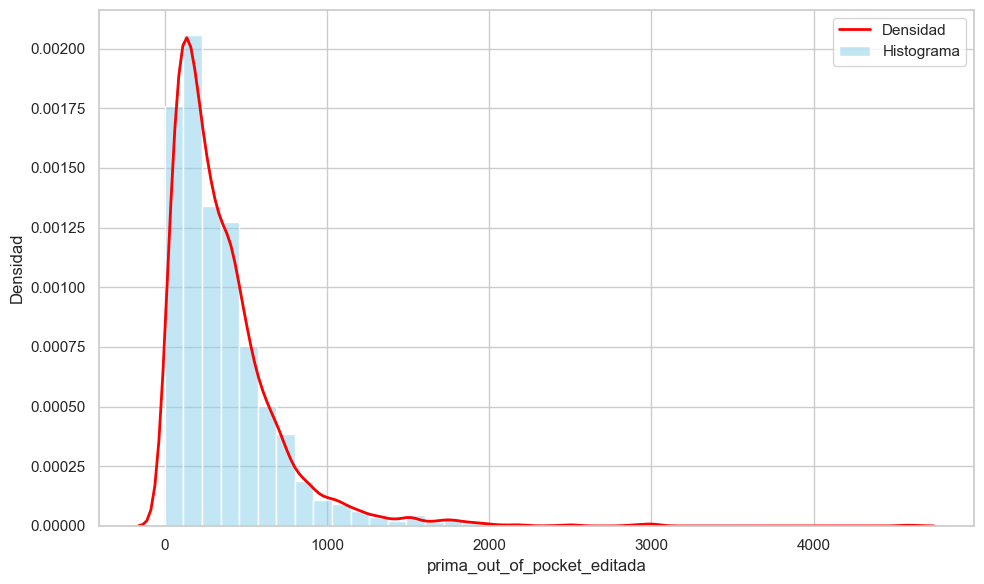

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Cargar el dataset final actualizado
df = pd.read_csv('../Models/meps_ml_dataset.csv')

# Extraer la variable objetivo
primas = pd.to_numeric(df['prima_out_of_pocket_editada'], errors='coerce').dropna().values

# Estadísticos descriptivos
n_validas = len(primas)
minimo = primas.min() if n_validas > 0 else np.nan
maximo = primas.max() if n_validas > 0 else np.nan
media = primas.mean() if n_validas > 0 else np.nan
mediana = np.median(primas) if n_validas > 0 else np.nan
q1 = np.percentile(primas, 25) if n_validas > 0 else np.nan
q3 = np.percentile(primas, 75) if n_validas > 0 else np.nan
varianza = primas.var() if n_validas > 0 else np.nan
desv_std = primas.std() if n_validas > 0 else np.nan
dispersion = maximo - minimo if n_validas > 0 else np.nan

# Outliers usando z-score > 3
z_scores = zscore(primas) if n_validas > 0 else np.array([])
outlier_mask = np.abs(z_scores) > 3
n_outliers = outlier_mask.sum()

print(f'Entradas válidas: {n_validas}')
print(f'Mínimo: {minimo:.2f}')
print(f'Máximo: {maximo:.2f}')
print(f'Media: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'Varianza: {varianza:.2f}')
print(f'Desviación estándar: {desv_std:.2f}')
print(f'Dispersión (máx - mín): {dispersion:.2f}')
print(f'Cantidad de outliers (|z|>3): {n_outliers}')

# Gráfico combinado: histograma + densidad
plt.figure(figsize=(10,6))
sns.histplot(primas, bins=40, kde=True, color='skyblue', stat='density', label='Histograma')
sns.kdeplot(primas, color='red', linewidth=2, label='Densidad')
plt.xlabel('prima_out_of_pocket_editada')
plt.ylabel('Densidad')
plt.legend()
plt.tight_layout()
plt.show()

## Visualización y correlación de variables en el dataset final para modelado
A continuación se presentan:
- Una tabla de correlación visual entre las variables del dataset final (`meps_ml_dataset.csv`).
- Gráficos de barras para: cantidad de hombres y mujeres, cantidad de personas por región, por raza, por cada una de las 20 enfermedades principales, por rangos de edad (de 5 años) y por rangos de pagos de prima (de 100).
Todos los gráficos usan el color por defecto de Matplotlib.

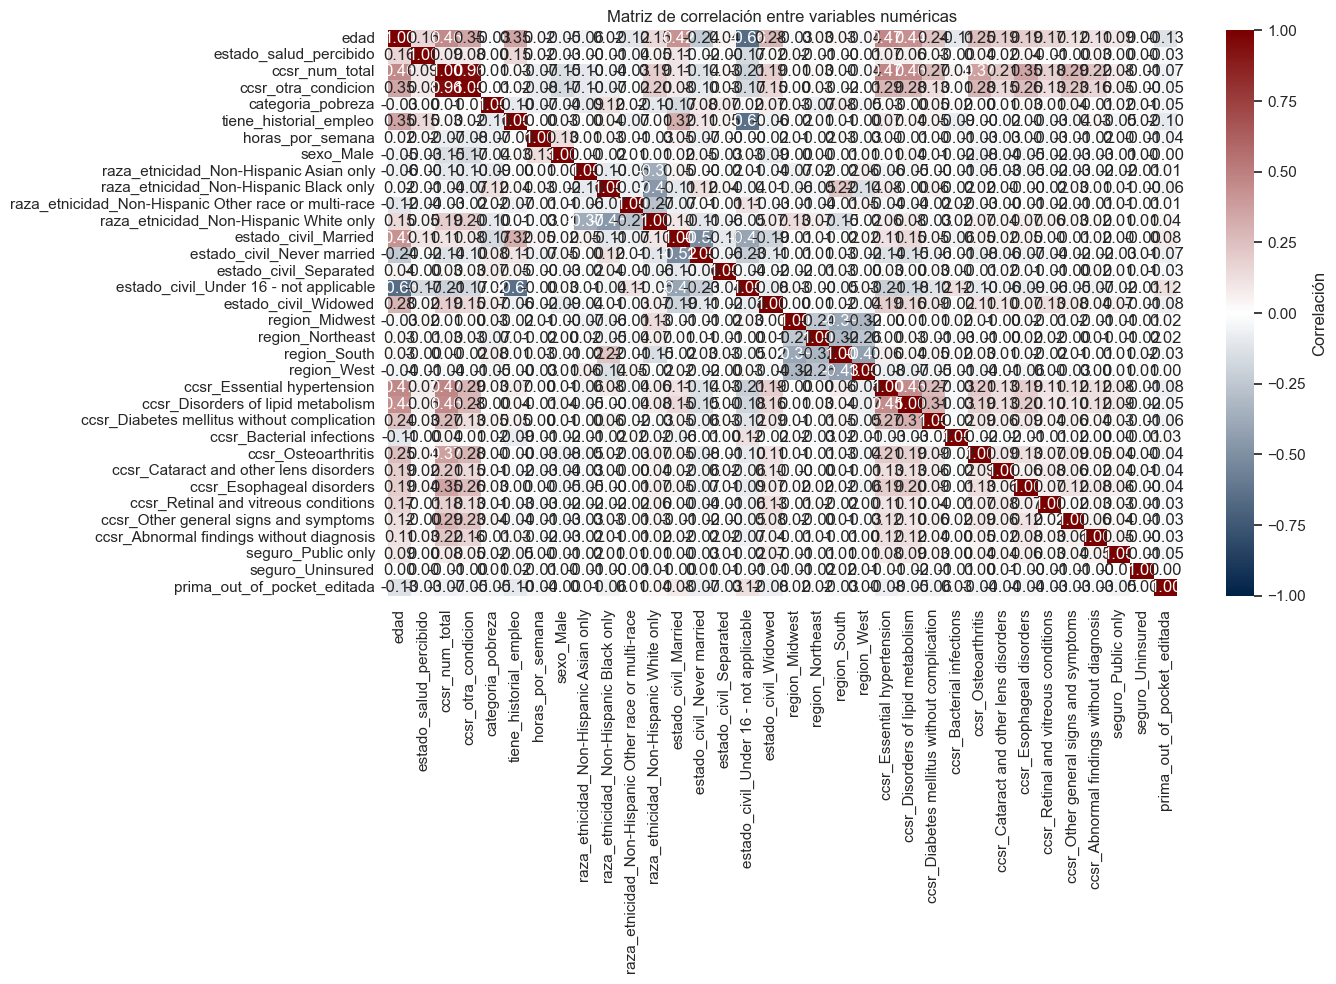

In [92]:
# Cargar el dataset final para modelado
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Leer el dataset actualizado
df = pd.read_csv('../Models/meps_ml_dataset.csv')

# Seleccionar solo columnas numéricas para la matriz de correlación
cols_numericas = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[cols_numericas].corr(numeric_only=True)

# Crear un gradiente de azul oscuro (correlación baja) a rojo oscuro (correlación alta)
cmap = LinearSegmentedColormap.from_list('custom_corr', ['#002147', '#ffffff', '#7b0000'])

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1, cbar_kws={'label': 'Correlación'})
plt.title('Matriz de correlación entre variables numéricas')
plt.tight_layout()
plt.show()

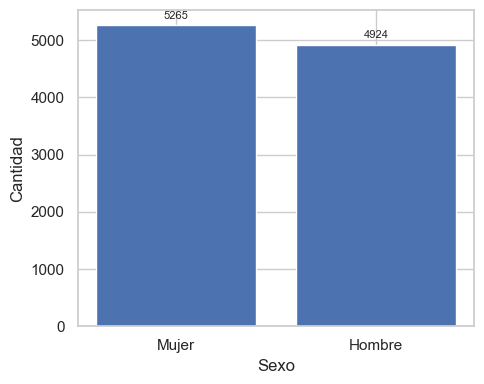

In [93]:
# Gráfico de barras: cantidad de hombres y mujeres
import matplotlib.pyplot as plt
import numpy as np

sex_counts = df['sexo_Male'].value_counts().sort_index()
plt.figure(figsize=(5,4))
bars = plt.bar(['Mujer','Hombre'], [len(df)-sex_counts.get(1,0), sex_counts.get(1,0)])

plt.ylabel('Cantidad')
plt.xlabel('Sexo')
# Etiquetas en cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

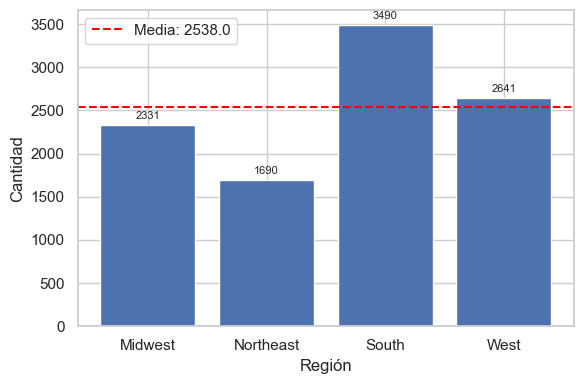

In [94]:
# Gráfico de barras: cantidad de personas por región
import matplotlib.pyplot as plt
import numpy as np

region_cols = ['region_Midwest','region_Northeast','region_South','region_West']
region_labels = ['Midwest','Northeast','South','West']
region_counts = [df[col].sum() for col in region_cols]
plt.figure(figsize=(6,4))
bars = plt.bar(region_labels, region_counts)

plt.ylabel('Cantidad')
plt.xlabel('Región')
# Línea de la media
media_region = np.mean(region_counts)
plt.axhline(media_region, color='red', linestyle='--', label=f'Media: {media_region:.1f}')
# Etiquetas en cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

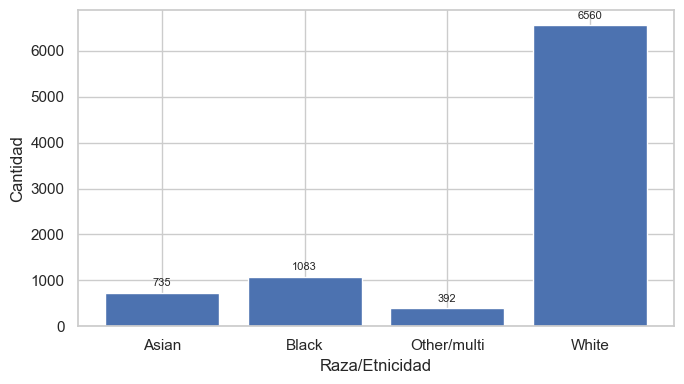

In [95]:
# Gráfico de barras: cantidad de personas por raza
import matplotlib.pyplot as plt

race_cols = [
    'raza_etnicidad_Non-Hispanic Asian only',
    'raza_etnicidad_Non-Hispanic Black only',
    'raza_etnicidad_Non-Hispanic Other race or multi-race',
    'raza_etnicidad_Non-Hispanic White only'
 ]
race_labels = ['Asian','Black','Other/multi','White']
race_counts = [df[col].sum() for col in race_cols]
plt.figure(figsize=(7,4))
bars = plt.bar(race_labels, race_counts)

plt.ylabel('Cantidad')
plt.xlabel('Raza/Etnicidad')
# Etiquetas en cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

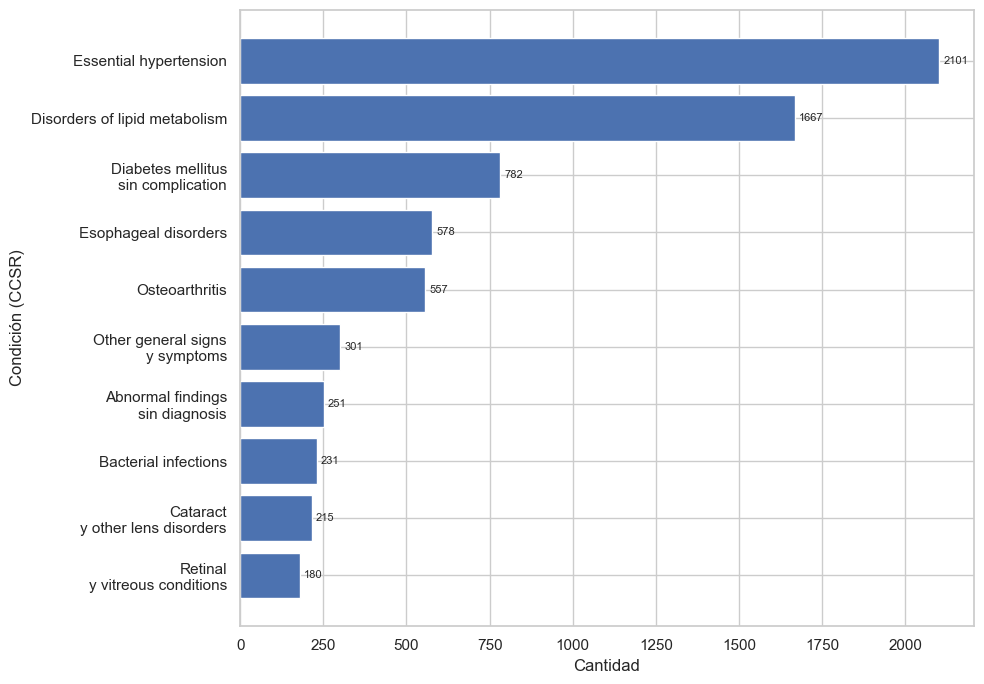

In [96]:
# Gráfico de barras: cantidad de personas con cada una de las 10 enfermedades principales (horizontal)
import matplotlib.pyplot as plt
import numpy as np

disease_cols = [
    'ccsr_Essential hypertension',
    'ccsr_Disorders of lipid metabolism',
    'ccsr_Diabetes mellitus without complication',
    'ccsr_Bacterial infections',
    'ccsr_Osteoarthritis',
    'ccsr_Cataract and other lens disorders',
    'ccsr_Esophageal disorders',
    'ccsr_Retinal and vitreous conditions',
    'ccsr_Other general signs and symptoms',
    'ccsr_Abnormal findings without diagnosis'
 ]
disease_labels = [col.replace('ccsr_','').replace(' and ','\ny ').replace(' or ','/').replace(' without ','\nsin ').replace(' with ','\ncon ') for col in disease_cols]
disease_counts = [df[col].sum() for col in disease_cols]
# Ordenar de mayor a menor
sorted_idx = np.argsort(disease_counts)[::-1]
disease_labels_sorted = [disease_labels[i] for i in sorted_idx]
disease_counts_sorted = [disease_counts[i] for i in sorted_idx]
plt.figure(figsize=(10,7))
bars = plt.barh(disease_labels_sorted, disease_counts_sorted)

plt.xlabel('Cantidad')
plt.ylabel('Condición (CCSR)')
plt.gca().invert_yaxis()
# Etiquetas en cada barra
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width)}',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),
                 textcoords="offset points",
                 ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()

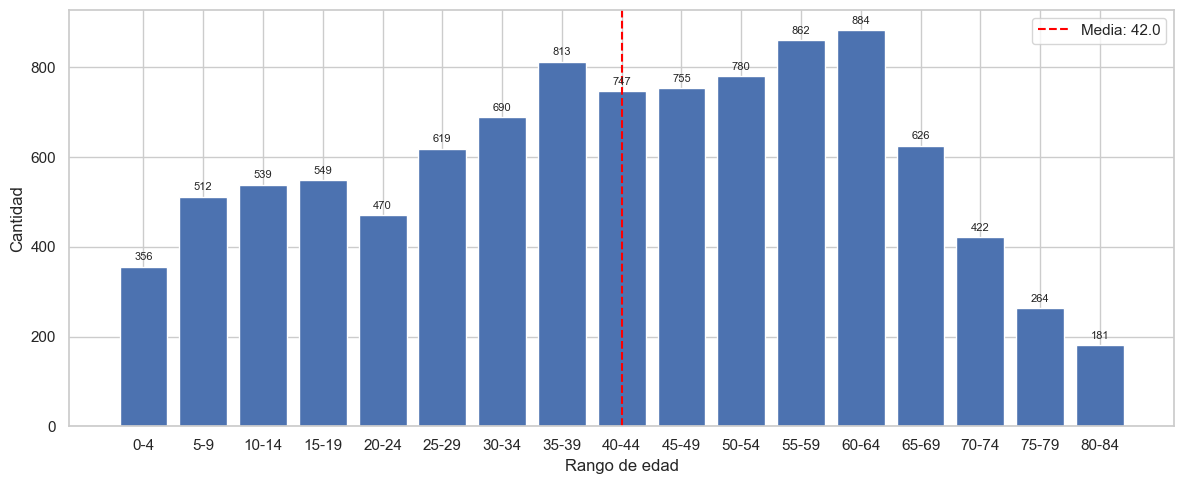

In [97]:
# Gráfico de barras: cantidad de personas por rango de edad (5 años)
bins = np.arange(df['edad'].min(), df['edad'].max()+5, 5)
labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-1)]
df['edad_rango'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False, include_lowest=True)
edad_counts = df['edad_rango'].value_counts().sort_index()
plt.figure(figsize=(12,5))
bars = plt.bar(edad_counts.index.astype(str), edad_counts.values)

plt.ylabel('Cantidad')
plt.xlabel('Rango de edad')
plt.xticks(rotation=0)  # Etiquetas horizontales
# Línea de la media de edad
media_edad = df['edad'].mean()
# Buscar el bin donde cae la media
media_bin = None
for i, (left, right) in enumerate(zip(bins[:-1], bins[1:])):
    if left <= media_edad < right:
        media_bin = i
        break
if media_bin is not None:
    plt.axvline(x=media_bin, color='red', linestyle='--', label=f'Media: {media_edad:.1f}')
# Etiquetas en cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

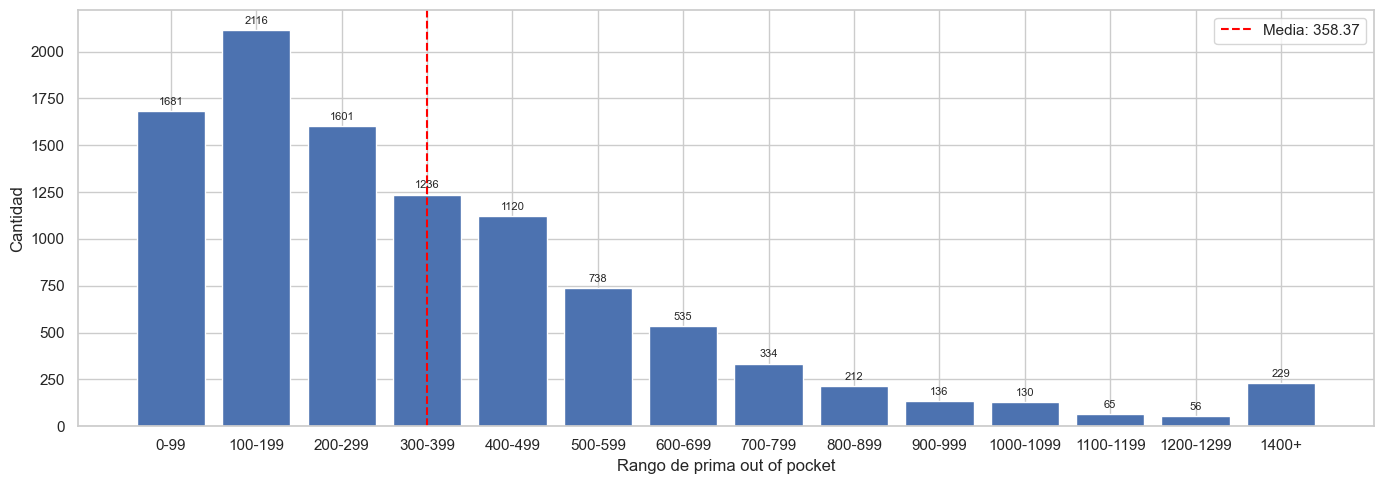

In [98]:
# Gráfico de barras: cantidad de personas por rango de pagos de prima (rangos de 100, 1400+ agrupado)
max_rango = 1400
bins = list(np.arange(0, max_rango, 100)) + [df['prima_out_of_pocket_editada'].max()+1]
labels = [f'{int(bins[i])}-{int(bins[i+1]-1)}' for i in range(len(bins)-2)] + ['1400+']
df['prima_rango'] = pd.cut(df['prima_out_of_pocket_editada'], bins=bins, labels=labels, right=False, include_lowest=True)
prima_counts = df['prima_rango'].value_counts().sort_index()
plt.figure(figsize=(14,5))
bars = plt.bar(prima_counts.index.astype(str), prima_counts.values)

plt.ylabel('Cantidad')
plt.xlabel('Rango de prima out of pocket')
plt.xticks(rotation=0)  # Etiquetas horizontales
# Línea de la media de la prima
media_prima = df['prima_out_of_pocket_editada'].mean()
# Calcular el bin de la media
media_bin = None
for i, (left, right) in enumerate(zip(bins[:-1], bins[1:])):
    if left <= media_prima < right:
        media_bin = i
        break
if media_bin is not None:
    plt.axvline(x=media_bin, color='red', linestyle='--', label=f'Media: {media_prima:.2f}')
# Etiquetas en cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
# Análisis de outliers de la variable objetivo (prima_out_of_pocket_editada)
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from scipy.spatial import distance

# Calcular z-score para la variable objetivo
z_scores = zscore(df['prima_out_of_pocket_editada'])
outlier_mask = abs(z_scores) > 3

outliers = df[outlier_mask]
no_outliers = df[~outlier_mask]

print(f"Cantidad de outliers (|z|>3): {len(outliers)}")
print(f"Porcentaje de outliers: {100*len(outliers)/len(df):.2f}%")

# Comparar medias de variables principales
variables = ['edad', 'ccsr_num_total', 'ccsr_otra_condicion']
for var in variables:
    media_out = outliers[var].mean()
    media_no = no_outliers[var].mean()
    print(f"Media de {var} - outliers: {media_out:.2f}, resto: {media_no:.2f}")

# Proporciones de sexo y región en outliers vs resto
def prop(col, grupo):
    return grupo[col].mean() if grupo[col].nunique() == 2 else grupo[col].value_counts(normalize=True)

print("\nProporción de sexo_Male (outliers vs resto):")
print(f"Outliers: {outliers['sexo_Male'].mean():.2f}, Resto: {no_outliers['sexo_Male'].mean():.2f}")

print("\nProporción por región (outliers):")
for col in ['region_Midwest','region_Northeast','region_South','region_West']:
    print(f"{col}: {outliers[col].mean():.2f}")
print("Proporción por región (resto):")
for col in ['region_Midwest','region_Northeast','region_South','region_West']:
    print(f"{col}: {no_outliers[col].mean():.2f}")

# Comparación de estado civil (one-hot)
marital_cols = [col for col in df.columns if col.startswith('estado_civil_')]
print("\nProporción por estado civil (outliers):")
for col in marital_cols:
    print(f"{col}: {outliers[col].mean():.2f}")
print("Proporción por estado civil (resto):")
for col in marital_cols:
    print(f"{col}: {no_outliers[col].mean():.2f}")

# Comparación de raza (one-hot)
race_cols = [col for col in df.columns if col.startswith('raza_etnicidad_')]
print("\nProporción por raza/etnicidad (outliers):")
for col in race_cols:
    print(f"{col}: {outliers[col].mean():.2f}")
print("Proporción por raza/etnicidad (resto):")
for col in race_cols:
    print(f"{col}: {no_outliers[col].mean():.2f}")

# Enfermedades principales: proporción de presencia en outliers vs resto
disease_cols = [
    'ccsr_Essential hypertension', 'ccsr_Disorders of lipid metabolism',
    'ccsr_Diabetes mellitus without complication', 'ccsr_Bacterial infections',
    'ccsr_Osteoarthritis', 'ccsr_Cataract and other lens disorders',
    'ccsr_Esophageal disorders', 'ccsr_Retinal and vitreous conditions',
    'ccsr_Other general signs and symptoms', 'ccsr_Abnormal findings without diagnosis',
    'ccsr_Other specified bone disease and musculoskeletal deformities', 'ccsr_Otitis media',
    'ccsr_Osteoporosis', 'ccsr_Thyroid disorders', 'ccsr_Neurodevelopmental disorders',
    'ccsr_Other and ill-defined heart disease', 'ccsr_Other specified upper respiratory infections',
    'ccsr_Nutritional deficiencies', 'ccsr_Other specified inflammatory condition of skin',
    'ccsr_General sensation/perception signs and symptoms'
]

# Filtrar solo las columnas que existen en el DataFrame
disease_cols_exist = [col for col in disease_cols if col in df.columns]
print("\nProporción de enfermedades principales en outliers vs resto:")
for col in disease_cols_exist:
    prop_out = outliers[col].mean()
    prop_no = no_outliers[col].mean()
    print(f"{col}: outliers={prop_out:.2f}, resto={prop_no:.2f}")

# Distancia de Mahalanobis entre medias de ambos grupos (usando variables numéricas y dummies)
from numpy.linalg import inv

# Seleccionar variables numéricas y dummies relevantes
feature_cols = variables + ['sexo_Male'] + ['region_Midwest','region_Northeast','region_South','region_West'] + marital_cols + race_cols + disease_cols_exist
X_out = outliers[feature_cols].fillna(0)
X_no = no_outliers[feature_cols].fillna(0)

mean_out = X_out.mean().values
mean_no = X_no.mean().values
cov = np.cov(np.vstack([X_out.values, X_no.values]).T)
try:
    inv_cov = inv(cov)
    maha = distance.mahalanobis(mean_out, mean_no, inv_cov)
    print(f"\nDistancia de Mahalanobis entre medias de outliers y resto: {maha:.2f}")
except np.linalg.LinAlgError:
    print("\nNo se pudo calcular la distancia de Mahalanobis (matriz singular)")



Cantidad de outliers (|z|>3): 186
Porcentaje de outliers: 1.83%
Media de edad - outliers: 36.76, resto: 42.13
Media de ccsr_num_total - outliers: 2.15, resto: 2.96
Media de ccsr_otra_condicion - outliers: 1.78, resto: 2.26

Proporción de sexo_Male (outliers vs resto):
Outliers: 0.46, Resto: 0.48

Proporción por región (outliers):
region_Midwest: 0.27
region_Northeast: 0.18
region_South: 0.19
region_West: 0.35
Proporción por región (resto):
region_Midwest: 0.23
region_Northeast: 0.17
region_South: 0.35
region_West: 0.26

Proporción por estado civil (outliers):
estado_civil_Married: 0.55
estado_civil_Never married: 0.20
estado_civil_Separated: 0.00
estado_civil_Under 16 - not applicable: 0.23
estado_civil_Widowed: 0.01
Proporción por estado civil (resto):
estado_civil_Married: 0.48
estado_civil_Never married: 0.23
estado_civil_Separated: 0.01
estado_civil_Under 16 - not applicable: 0.15
estado_civil_Widowed: 0.04

Proporción por raza/etnicidad (outliers):
raza_etnicidad_Non-Hispanic Asia

c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

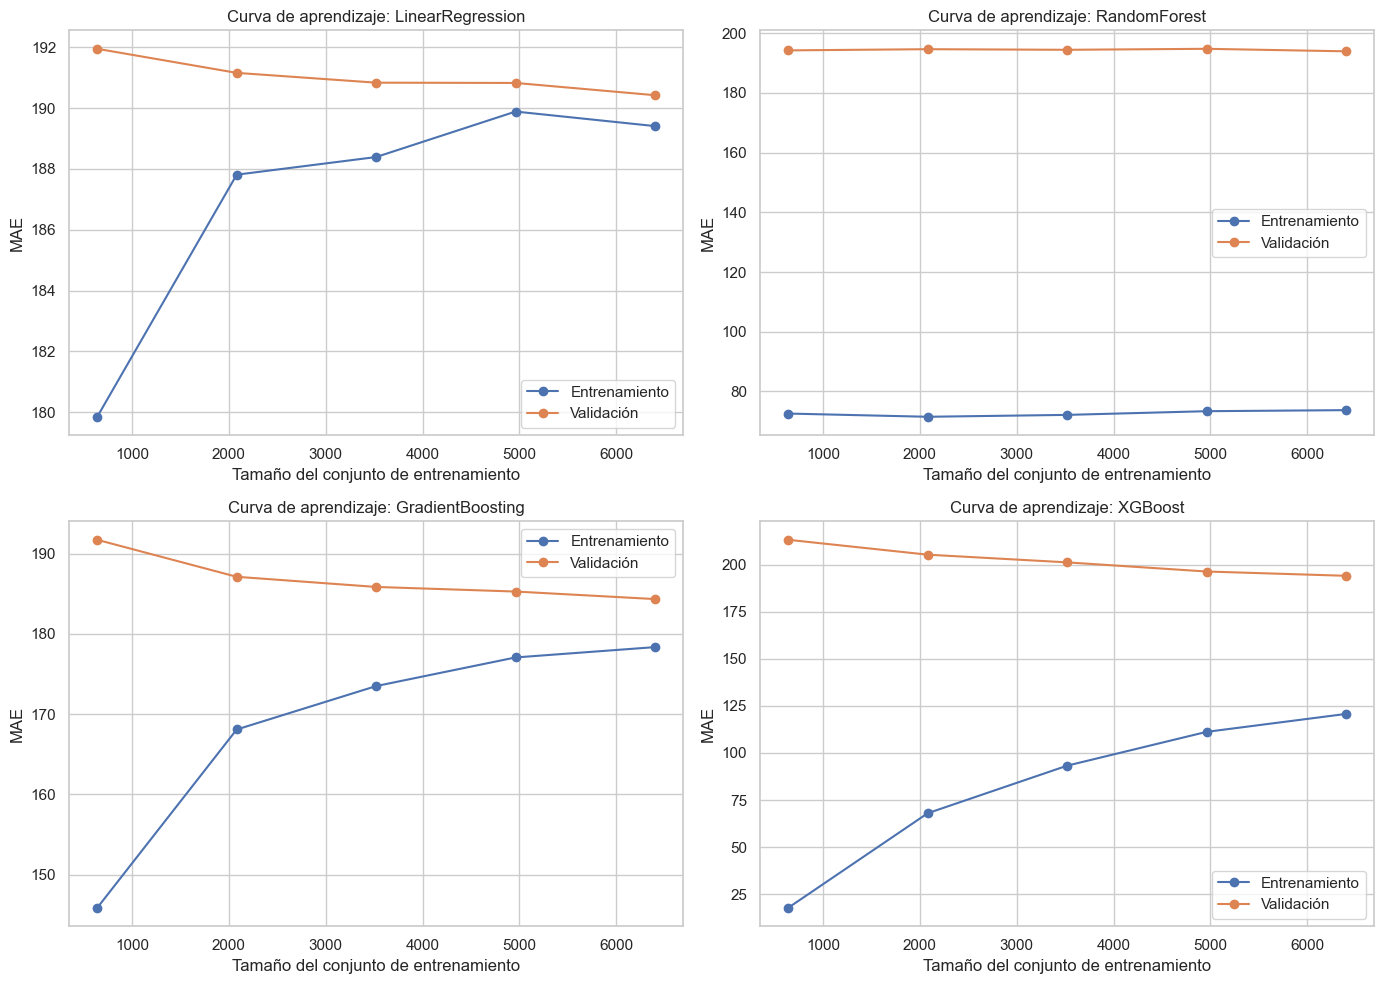

Comparación de modelos (sin outliers):


,Modelo,MAE,RMSE,R2
0,LinearRegression,191.60,252.71,0.06
1,RandomForest,196.30,258.56,0.01
2,GradientBoosting,186.71,247.28,0.10
3,XGBoost,195.13,259.11,0.01


No hay columnas de estado civil en el dataset para graficar.


In [100]:
# Modelado: Comparación de 4 modelos de regresión para predecir la prima out of pocket (sin outliers)
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

# XGBoost
try:
    from xgboost import XGBRegressor
except ImportError:
    print('XGBoost no está instalado. Instálalo con: pip install xgboost')
    XGBRegressor = None

# Filtrar y quitar outliers de la variable objetivo (|z|>3)
z_scores = zscore(df['prima_out_of_pocket_editada'])
mask_no_outliers = np.abs(z_scores) <= 3
df_no_out = df[mask_no_outliers].copy()

# Selección de variables predictoras (excluyendo la variable objetivo y columnas no numéricas)
X = df_no_out.drop(columns=['prima_out_of_pocket_editada','prima_rango','edad_rango'], errors='ignore')
y = df_no_out['prima_out_of_pocket_editada']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
modelos = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}
if XGBRegressor is not None:
    modelos['XGBoost'] = XGBRegressor(random_state=42, verbosity=0)

metricas = {'Modelo': [], 'MAE': [], 'RMSE': [], 'R2': []}
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (nombre, modelo) in enumerate(modelos.items()):
    # Curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    ax = axes[i]
    ax.plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
    ax.plot(train_sizes, test_scores_mean, 'o-', label='Validación')
    ax.set_title(f'Curva de aprendizaje: {nombre}')
    ax.set_xlabel('Tamaño del conjunto de entrenamiento')
    ax.set_ylabel('MAE')
    ax.legend()
    # Entrenar y evaluar
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    metricas['Modelo'].append(nombre)
    metricas['MAE'].append(mae)
    metricas['RMSE'].append(rmse)
    metricas['R2'].append(r2)
# Si hay menos de 4 modelos, ocultar los ejes vacíos
for j in range(i+1, 4):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Tabla comparativa de métricas
metricas_df = pd.DataFrame(metricas)
print('Comparación de modelos (sin outliers):')
display(metricas_df.style.format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'R2': '{:.2f}'}))

# Visualización: Distribución de estado civil (nuevo dataset)
import matplotlib.pyplot as plt
marital_cols = [col for col in df.columns if col.startswith('marital_')]
marital_counts = df[marital_cols].sum().sort_values(ascending=False)
if marital_counts.empty:
    print('No hay columnas de estado civil en el dataset para graficar.')
else:
    plt.figure(figsize=(8,4))
    marital_counts.plot(kind='bar', color='orchid')
    plt.title('Distribución de Estado Civil')
    plt.ylabel('Número de personas')
    plt.xlabel('Estado civil')
    plt.show()

c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

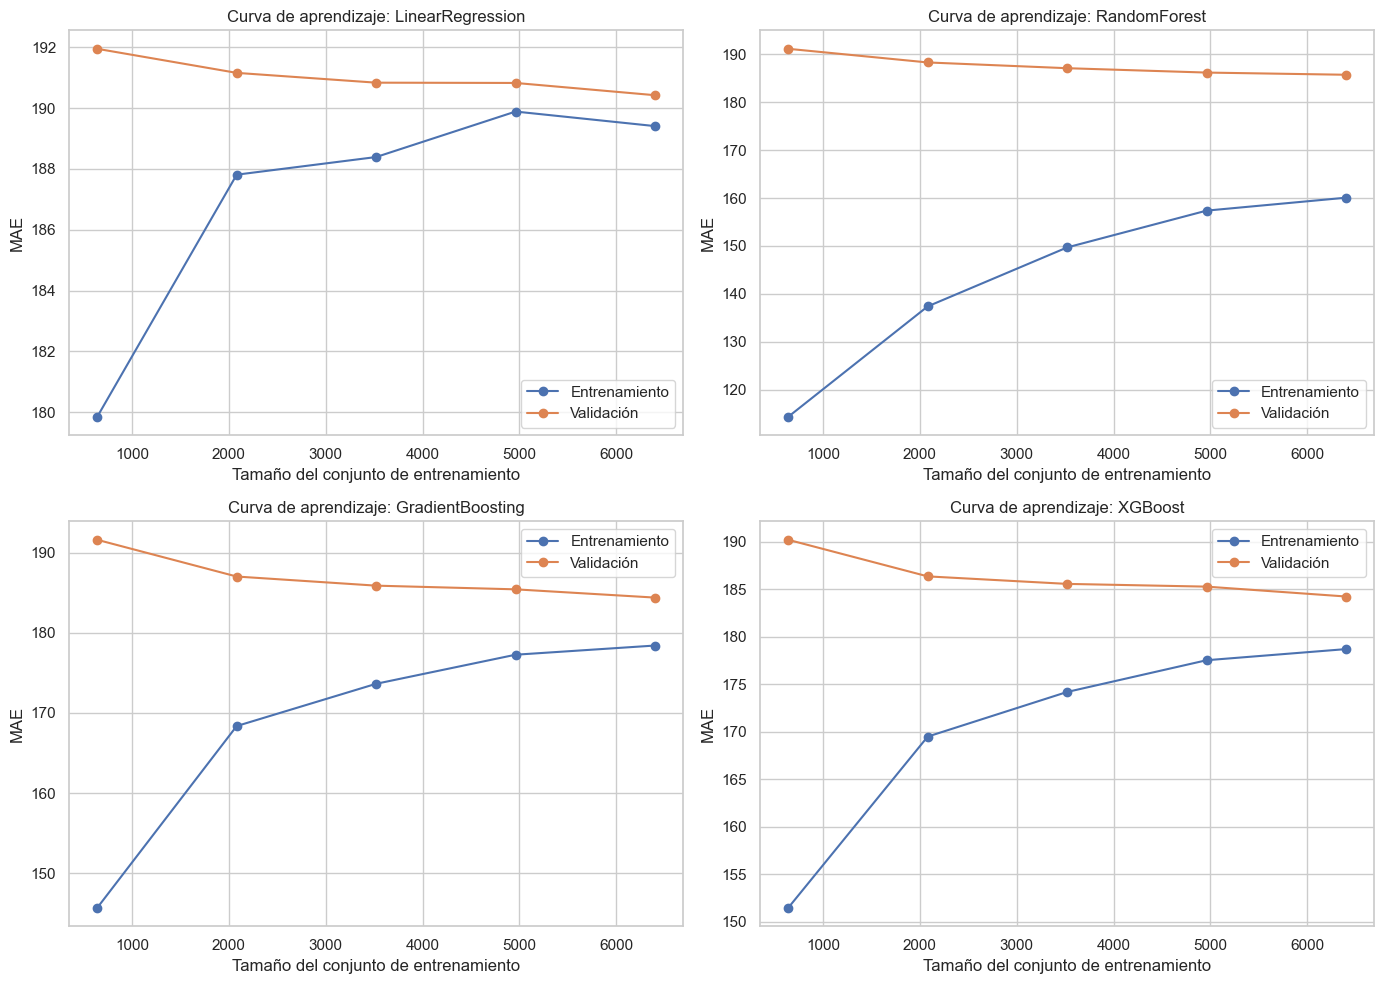

Comparación de modelos con ajuste de hiperparámetros:


,Modelo,MAE,RMSE,R2,Bias,Varianza
0,LinearRegression,191.60,252.71,0.06,-0.15,4786.28
1,RandomForest,187.35,248.62,0.09,2.86,9098.07
2,GradientBoosting,186.89,247.47,0.09,0.84,7156.23
3,XGBoost,186.80,247.24,0.10,0.70,7099.15


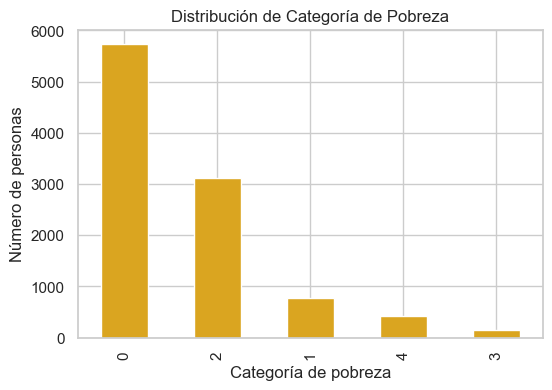

In [103]:
# Modelado avanzado: Ajuste de hiperparámetros y validación cruzada para regresión
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore

# XGBoost
try:
    from xgboost import XGBRegressor
except ImportError:
    print('XGBoost no está instalado. Instálalo con: pip install xgboost')
    XGBRegressor = None

# Filtrar y quitar outliers de la variable objetivo (|z|>3)
z_scores = zscore(df['prima_out_of_pocket_editada'])
mask_no_outliers = np.abs(z_scores) <= 3
df_no_out = df[mask_no_outliers].copy()

# Selección de variables predictoras (excluyendo la variable objetivo y columnas no numéricas)
X = df_no_out.drop(columns=['prima_out_of_pocket_editada','prima_rango','edad_rango'], errors='ignore')
y = df_no_out['prima_out_of_pocket_editada']

# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir modelos y grids de hiperparámetros
modelos = {
    'LinearRegression': (LinearRegression(), {}),
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    })
}
if XGBRegressor is not None:
    modelos['XGBoost'] = (XGBRegressor(random_state=42, verbosity=0), {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    })

metricas = {'Modelo': [], 'MAE': [], 'RMSE': [], 'R2': [], 'Bias': [], 'Varianza': []}
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (nombre, (modelo, grid)) in enumerate(modelos.items()):
    if grid:
        search = GridSearchCV(modelo, grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
        search.fit(X_train, y_train)
        best_model = search.best_estimator_
    else:
        best_model = modelo.fit(X_train, y_train)
    # Curva de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error',
        train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
    )
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    ax = axes[i]
    ax.plot(train_sizes, train_scores_mean, 'o-', label='Entrenamiento')
    ax.plot(train_sizes, test_scores_mean, 'o-', label='Validación')
    ax.set_title(f'Curva de aprendizaje: {nombre}')
    ax.set_xlabel('Tamaño del conjunto de entrenamiento')
    ax.set_ylabel('MAE')
    ax.legend()
    # Evaluar en test
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    # Calcular bias y varianza usando cross_val_predict
    y_pred_cv = cross_val_predict(best_model, X_train, y_train, cv=5, n_jobs=-1)
    bias = np.mean(y_pred_cv - y_train)
    varianza = np.var(y_pred_cv)
    metricas['Modelo'].append(nombre)
    metricas['MAE'].append(mae)
    metricas['RMSE'].append(rmse)
    metricas['R2'].append(r2)
    metricas['Bias'].append(bias)
    metricas['Varianza'].append(varianza)
# Si hay menos de 4 modelos, ocultar los ejes vacíos
for j in range(i+1, 4):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Tabla comparativa de métricas
metricas_df = pd.DataFrame(metricas)
print('Comparación de modelos con ajuste de hiperparámetros:')
display(metricas_df.style.format({'MAE': '{:.2f}', 'RMSE': '{:.2f}', 'R2': '{:.2f}', 'Bias': '{:.2f}', 'Varianza': '{:.2f}'}))

# Visualización: Distribución de categoría de pobreza (nuevo dataset)
poverty_counts = df['categoria_pobreza'].value_counts()
plt.figure(figsize=(6,4))
poverty_counts.plot(kind='bar', color='goldenrod')
plt.title('Distribución de Categoría de Pobreza')
plt.ylabel('Número de personas')
plt.xlabel('Categoría de pobreza')
plt.show()

## Justificación matemática y visual de la no linealidad y dificultades de la variable objetivo
La predicción de la prima *out of pocket* presenta dificultades importantes debido a la naturaleza no lineal y la alta dispersión de la variable objetivo. A continuación se muestran evidencias numéricas y visuales:
- Se comparan correlaciones lineales (Pearson) y no lineales (Spearman) entre la variable objetivo y las principales variables predictoras.
- Se visualizan relaciones mediante scatterplots y se ajustan regresiones lineales y polinómicas para mostrar la falta de ajuste lineal.
- Se analiza la distribución de los residuos de un modelo lineal para evidenciar patrones no explicados por la linealidad.
- Se discuten las implicaciones para el modelado y la selección de algoritmos.


Métricas de correlación y ajuste lineal/polinómico para la variable objetivo (todas las variables predictoras):


c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

,Variable,Pearson,Spearman,R2 Lineal,MAE Lineal,RMSE Lineal,R2 Polinómico,MAE Polinómico,RMSE Polinómico
0,edad,-0.13,-0.15,0.02,227.11,333.84,0.02,227.14,333.82
1,estado_salud_percibido,-0.03,-0.04,0.00,230.93,336.43,0.00,230.66,335.83
2,ccsr_num_total,-0.07,-0.05,0.00,230.33,335.82,0.00,230.33,335.82
3,ccsr_otra_condicion,-0.05,-0.03,0.00,230.79,336.22,0.00,230.76,336.21
4,categoria_pobreza,-0.05,-0.08,0.00,230.59,336.24,0.00,230.45,335.96
5,tiene_historial_empleo,-0.10,-0.12,0.01,229.12,334.90,0.01,229.13,334.90
6,horas_por_semana,-0.04,-0.09,0.00,230.95,336.32,0.00,230.79,336.11
7,sexo_Male,-0.00,0.00,0.00,231.24,336.62,-0.00,231.27,336.62
8,raza_etnicidad_Non-Hispanic Asian only,0.01,0.02,0.00,231.11,336.60,0.00,231.16,336.60
9,raza_etnicidad_Non-Hispanic Black only,-0.06,-0.06,0.00,230.72,336.08,0.00,230.72,336.09


c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 multivariable lineal (todas las variables): 0.05588446188567131
MAE multivariable lineal: 219.38492623444662
RMSE multivariable lineal: 327.07499127797144
Distribución de residuos (media, std): 3.320561674938947e-14 327.09104285657793
Skewness de residuos: 3.0806604967131395


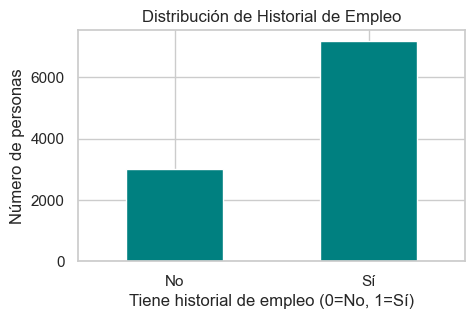

In [102]:
# Análisis numérico de la linealidad entre todas las variables predictoras y la variable objetivo
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar todas las variables numéricas y dummies excepto la variable objetivo y columnas auxiliares
cols_excluir = ['prima_out_of_pocket_editada', 'prima_rango', 'edad_rango']
variables_analisis = [col for col in df.columns if col not in cols_excluir and pd.api.types.is_numeric_dtype(df[col])]
resultados = []

for var in variables_analisis:
    x = df[var].values.reshape(-1, 1)
    y = df['prima_out_of_pocket_editada'].values
    # Correlaciones
    pear, _ = pearsonr(df[var], y)
    spear, _ = spearmanr(df[var], y)
    # Regresión lineal
    lr = LinearRegression().fit(x, y)
    y_pred = lr.predict(x)
    r2_lin = r2_score(y, y_pred)
    mae_lin = mean_absolute_error(y, y_pred)
    rmse_lin = mean_squared_error(y, y_pred, squared=False)
    # Regresión polinómica grado 2
    poly = PolynomialFeatures(degree=2)
    x_poly = poly.fit_transform(x)
    lr_poly = LinearRegression().fit(x_poly, y)
    y_poly_pred = lr_poly.predict(x_poly)
    r2_poly = r2_score(y, y_poly_pred)
    mae_poly = mean_absolute_error(y, y_poly_pred)
    rmse_poly = mean_squared_error(y, y_poly_pred, squared=False)
    resultados.append({
        'Variable': var,
        'Pearson': pear,
        'Spearman': spear,
        'R2 Lineal': r2_lin,
        'MAE Lineal': mae_lin,
        'RMSE Lineal': rmse_lin,
        'R2 Polinómico': r2_poly,
        'MAE Polinómico': mae_poly,
        'RMSE Polinómico': rmse_poly
    })

resultados_df = pd.DataFrame(resultados)
print('Métricas de correlación y ajuste lineal/polinómico para la variable objetivo (todas las variables predictoras):')
display(resultados_df.style.format({'Pearson': '{:.2f}', 'Spearman': '{:.2f}', 'R2 Lineal': '{:.2f}', 'MAE Lineal': '{:.2f}', 'RMSE Lineal': '{:.2f}', 'R2 Polinómico': '{:.2f}', 'MAE Polinómico': '{:.2f}', 'RMSE Polinómico': '{:.2f}'}))

# Análisis de regresión lineal multivariable con todas las variables predictoras
X_simple = df[variables_analisis]
y_simple = df['prima_out_of_pocket_editada']
lr_simple = LinearRegression().fit(X_simple, y_simple)
y_pred_simple = lr_simple.predict(X_simple)
residuos = y_simple - y_pred_simple
print('R2 multivariable lineal (todas las variables):', r2_score(y_simple, y_pred_simple))
print('MAE multivariable lineal:', mean_absolute_error(y_simple, y_pred_simple))
print('RMSE multivariable lineal:', mean_squared_error(y_simple, y_pred_simple, squared=False))
print('Distribución de residuos (media, std):', residuos.mean(), residuos.std())
print('Skewness de residuos:', pd.Series(residuos).skew())

# Visualización: Distribución de personas con historial de empleo (nuevo dataset)
employment_counts = df['tiene_historial_empleo'].value_counts().sort_index()
plt.figure(figsize=(5,3))
employment_counts.plot(kind='bar', color='teal')
plt.title('Distribución de Historial de Empleo')
plt.ylabel('Número de personas')
plt.xlabel('Tiene historial de empleo (0=No, 1=Sí)')
plt.xticks([0,1], ['No', 'Sí'], rotation=0)
plt.show()


In [108]:
# Entrenamiento y guardado de RandomForestRegressor multivariado (MultiOutputRegressor) para predicción de límites personalizados de prima (para interfaz Streamlit)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import zscore
import joblib
import os

# Leer el dataset
ruta_dataset = '../Models/meps_ml_dataset.csv'
df = pd.read_csv(ruta_dataset)

# Definir columnas de features (igual que en el modelo principal)
feature_cols = [
    'edad', 'estado_salud_percibido', 'ccsr_num_total', 'ccsr_otra_condicion', 'categoria_pobreza',
    'tiene_historial_empleo', 'horas_por_semana',
    'sexo_Male',
    'raza_etnicidad_Non-Hispanic Asian only', 'raza_etnicidad_Non-Hispanic Black only',
    'raza_etnicidad_Non-Hispanic Other race or multi-race', 'raza_etnicidad_Non-Hispanic White only',
    'estado_civil_Married', 'estado_civil_Never married', 'estado_civil_Separated',
    'estado_civil_Under 16 - not applicable', 'estado_civil_Widowed',
    'region_Midwest', 'region_Northeast', 'region_South', 'region_West',
    'ccsr_Essential hypertension', 'ccsr_Disorders of lipid metabolism', 'ccsr_Diabetes mellitus without complication',
    'ccsr_Bacterial infections', 'ccsr_Osteoarthritis', 'ccsr_Cataract and other lens disorders',
    'ccsr_Esophageal disorders', 'ccsr_Retinal and vitreous conditions', 'ccsr_Other general signs and symptoms',
    'ccsr_Abnormal findings without diagnosis',
    'seguro_Public only', 'seguro_Uninsured'
]

# Target: calcular los límites personalizados (excelente, bueno, regular) para cada persona usando vecinos más similares
from sklearn.neighbors import NearestNeighbors

X = df[feature_cols]
y = df['prima_out_of_pocket_editada']

# Dividir en train/test (sin fuga de información)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Eliminar outliers en train usando z-score (umbral 3)
z_scores = np.abs(zscore(y_train))
mask_train = z_scores < 3
X_train_clean = X_train[mask_train]
y_train_clean = y_train[mask_train]

# Para cada persona, obtener los k vecinos más similares y calcular los percentiles 25, 50, 75 de la prima
k = 50  # número de vecinos para personalización
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X_train_clean)

def obtener_limites_personalizados(X_ref, y_ref, X_query):
    '''Para cada fila de X_query, busca los k vecinos más cercanos en X_ref y calcula los percentiles 25, 50, 75 de y_ref'''
    dist, idx = nbrs.kneighbors(X_query)
    limites = []
    for indices in idx:
        primas_vecinas = y_ref.iloc[indices]
        lim_exc = np.percentile(primas_vecinas, 25)
        lim_bueno = np.percentile(primas_vecinas, 50)
        lim_reg = np.percentile(primas_vecinas, 75)
        limites.append([lim_exc, lim_bueno, lim_reg])
    return np.array(limites)

# Generar los límites personalizados para cada persona en el set de entrenamiento limpio
limites_train = obtener_limites_personalizados(X_train_clean, y_train_clean, X_train_clean)

# Entrenar un MultiOutputRegressor con RandomForest para predecir los 3 límites personalizados
rf = RandomForestRegressor(random_state=42)
multi_rf = MultiOutputRegressor(rf)
multi_rf.fit(X_train_clean, limites_train)

# Guardar el modelo y la lista de features en la carpeta interface
os.makedirs('../interface', exist_ok=True)
modelo_path = '../interface/random_forest_model.pkl'
joblib.dump({'model': multi_rf, 'features': feature_cols}, modelo_path)
print(f'Modelo MultiOutputRegressor(RandomForest) guardado en: {modelo_path}')

# Evaluar el modelo en el set de test: calcular límites personalizados para test y predecir
limites_test = obtener_limites_personalizados(X_train_clean, y_train_clean, X_test)
limites_pred = multi_rf.predict(X_test)

# Calcular métricas para cada límite
nombres_limites = ['Excelente','Bueno','Regular']
for i, nombre in enumerate(nombres_limites):
    mae = mean_absolute_error(limites_test[:,i], limites_pred[:,i])
    rmse = mean_squared_error(limites_test[:,i], limites_pred[:,i], squared=False)
    r2 = r2_score(limites_test[:,i], limites_pred[:,i])
    print(f"Límite {nombre}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")

# Ejemplo: mostrar los límites personalizados para las primeras 5 personas del test
for i, (lim_exc, lim_bueno, lim_reg) in enumerate(limites_pred[:5]):
    print(f'Persona {i+1}: Excelente [0, {lim_exc:.2f}], Bueno [{lim_exc:.2f}, {lim_bueno:.2f}], Regular [{lim_bueno:.2f}, {lim_reg:.2f}], Malo [>{lim_reg:.2f}]')

Modelo MultiOutputRegressor(RandomForest) guardado en: ../interface/random_forest_model.pkl
Límite Excelente: MAE=13.46, RMSE=18.83, R2=0.83
Límite Bueno: MAE=20.57, RMSE=28.19, R2=0.87
Límite Regular: MAE=29.48, RMSE=39.66, R2=0.85
Persona 1: Excelente [0, 164.79], Bueno [164.79, 370.73], Regular [370.73, 561.21], Malo [>561.21]
Persona 2: Excelente [0, 129.49], Bueno [129.49, 213.15], Regular [213.15, 439.12], Malo [>439.12]
Persona 3: Excelente [0, 206.46], Bueno [206.46, 386.39], Regular [386.39, 574.84], Malo [>574.84]
Persona 4: Excelente [0, 114.63], Bueno [114.63, 233.70], Regular [233.70, 306.48], Malo [>306.48]
Persona 5: Excelente [0, 180.75], Bueno [180.75, 299.77], Regular [299.77, 547.02], Malo [>547.02]
Límite Excelente: MAE=13.46, RMSE=18.83, R2=0.83
Límite Bueno: MAE=20.57, RMSE=28.19, R2=0.87
Límite Regular: MAE=29.48, RMSE=39.66, R2=0.85
Persona 1: Excelente [0, 164.79], Bueno [164.79, 370.73], Regular [370.73, 561.21], Malo [>561.21]
Persona 2: Excelente [0, 129.49]

c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DJSix\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
